### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [491]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [492]:
data = pd.read_csv('coupons.csv')

In [493]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [494]:
#Get record count and column count
data.shape

(12684, 26)

2. Investigate the dataset for missing or problematic data.

In [495]:
#Get basic info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

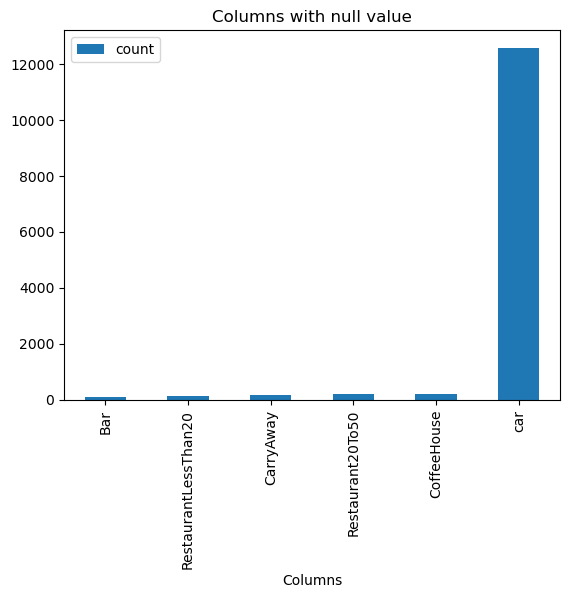

In [496]:
#Show count of null values in columns
df2  = data.melt()
df2 = df2[df2['value'].isna()]
df2 = df2.groupby('variable')[['variable']].value_counts().reset_index().sort_values(by='count', ascending=True)
ax = df2.plot(kind='bar', x="variable", y="count")
plt.title("Columns with null value")
plt.xlabel("Columns")
plt.show()


In [497]:
#Get info about values in column "car"
data['car'].value_counts()

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

In [498]:
#Count of null values in column "Bar"
data['Bar'].isna().value_counts()

Bar
False    12577
True       107
Name: count, dtype: int64

In [499]:
#Get count or records with null values (column "car" not included).
data[
  data['Bar'].isna() 
| data['RestaurantLessThan20'].isna()
| data['CarryAway'].isna()
| data['Restaurant20To50'].isna()
| data['CoffeeHouse'].isna()
].shape

(605, 26)

3. Decide what to do about your missing data -- drop, replace, other...

In [500]:
# fix 'car' column - i assume that empty means that driver was in a car, replaced fiew values aslo with value 'car'
data['car'] = data['car'].fillna('car')
data['car'] = data['car'].replace('Mazda5','car')
data['car'] = data['car'].replace('crossover','car')
data['car'] = data['car'].replace('Car that is too old to install Onstar :D','car')
data['car'].value_counts()

car
car                       12640
Scooter and motorcycle       22
do not drive                 22
Name: count, dtype: int64

**Answer:** Fixed data in column "car". Other null values leaved as they are for now.

4. What proportion of the total observations chose to accept the coupon?



In [502]:
val = round(data.query('Y == 1').shape[0] * 100/ data.shape[0],2)
print(f"Coupon was accepted in {val}% observations")

Coupon was accepted in 56.84% observations


**Answer:** Coupon was accepted in 56.84% observations

5. Use a bar plot to visualize the `coupon` column.

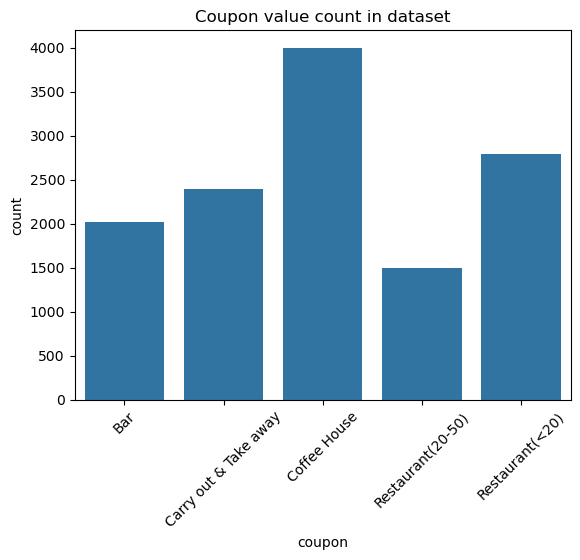

In [503]:
sns.barplot(data=data.groupby('coupon').size().reset_index(name='count'),x='coupon',y='count')
plt.title("Coupon value count in dataset")
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

In [504]:
#I want to check data also in celsius
data['temperatureC'] = round(((data['temperature']-32)*5)/9,1)

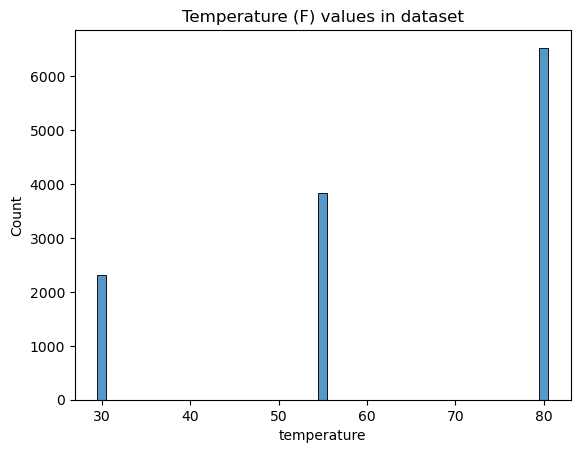

In [505]:
#This is histogram of the temperature column
sns.histplot(data['temperature'], discrete=True)
plt.title("Temperature (F) values in dataset")
plt.show()

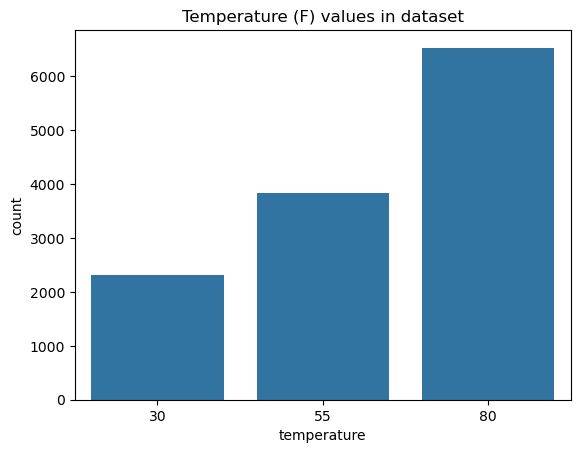

In [506]:
#Barplot of temperature column - in this case - better
sns.barplot(data=data.groupby('temperature').size().reset_index(name='count'),x='temperature',y='count')
plt.title("Temperature (F) values in dataset")
plt.show()

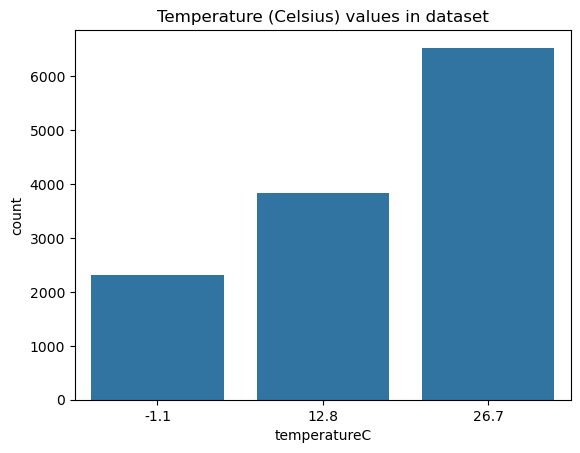

In [507]:
#Created to see temperatures in celisus
sns.barplot(data=data.groupby('temperatureC').size().reset_index(name='count'),x='temperatureC',y='count')
plt.title("Temperature (Celsius) values in dataset")
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [508]:
data_bar = data.query('coupon == "Bar"').copy()

2. What proportion of bar coupons were accepted?


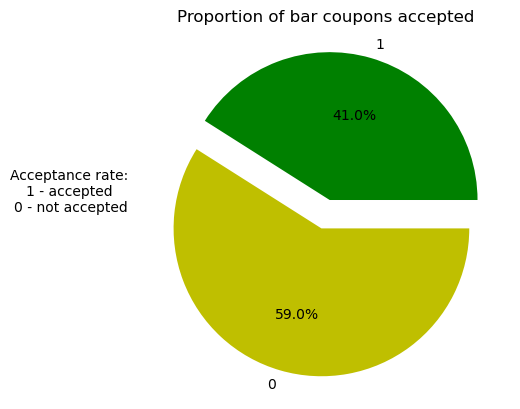

Y
1     827
0    1190
Name: count, dtype: int64


In [509]:
#41% of coupons were accepted
data_bar['Y'].value_counts().sort_values().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['g','y'])
plt.title("Proportion of bar coupons accepted")
plt.ylabel("Acceptance rate: \n1 - accepted \n0 - not accepted", rotation=0, labelpad=50)
plt.show()

print(data_bar['Y'].value_counts().sort_values())

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [510]:
data_bar['Bar'].value_counts()

Bar
never    830
less1    570
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64

In [511]:
data_bar['Bar1'] = data_bar['Bar'].replace({"never":"0~3", "less1":"0~3", "1~3":"0~3", "4~8":"4~", "gt8":"4~"})
data_bar['Bar1'].value_counts()

Bar1
0~3    1797
4~      199
Name: count, dtype: int64

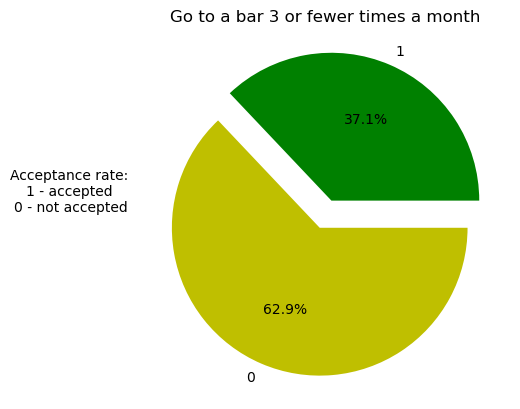

In [512]:
#Accpetance rate of those who went 3 or less times to bar
data_bar.query('Bar1=="0~3"')['Y'].value_counts().sort_values().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['g','y'])
plt.title("Go to a bar 3 or fewer times a month")
plt.ylabel("Acceptance rate: \n1 - accepted \n0 - not accepted", rotation=0, labelpad=50)
plt.show()

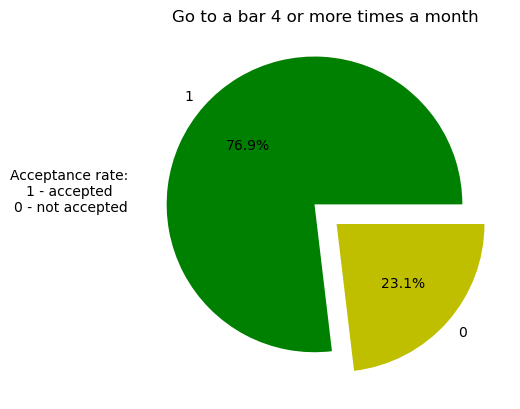

In [513]:
#Accpetance rate of those who went more than 3 times to bar
data_bar.query('Bar1=="4~"')['Y'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['g','y'], color='Bar1')
plt.title("Go to a bar 4 or more times a month")
plt.ylabel("Acceptance rate: \n1 - accepted \n0 - not accepted", rotation=0, labelpad=50)
plt.show()

**Answer:**
76.9% of those who went to bar 4 or more times, accepted the offer. However, only 37.1% of those who went to bar 3 or less times, accepted the offer.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [514]:
barValList = ['1~3','4~8','gt8']
ageValList = ['26','31','50plus','36','41','46']
data_bar['GoToBarAndAgeOver25'] = 0;
data_bar.loc[data_bar["Bar"].isin(barValList) & data_bar["age"].isin(ageValList), 'GoToBarAndAgeOver25'] = 1

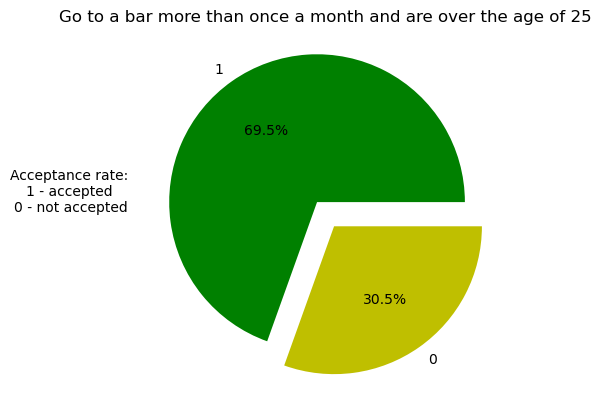

In [515]:
data_bar.query('GoToBarAndAgeOver25==1')['Y'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['g','y'])
plt.title("Go to a bar more than once a month and are over the age of 25")
plt.ylabel("Acceptance rate: \n1 - accepted \n0 - not accepted", rotation=0, labelpad=50)
plt.show()

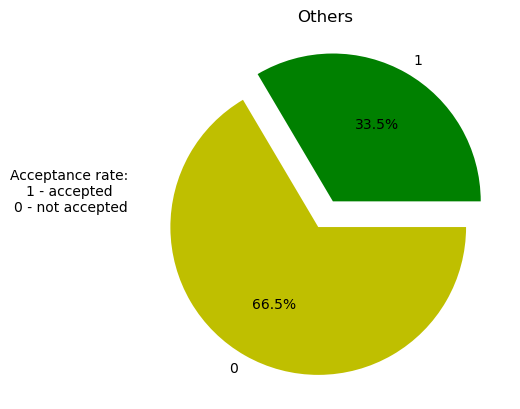

In [517]:
data_bar.query('GoToBarAndAgeOver25==0')['Y'].value_counts().sort_values().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['g','y'])
plt.title("Others")
plt.ylabel("Acceptance rate: \n1 - accepted \n0 - not accepted", rotation=0, labelpad=50)
plt.show()

**Answer:** The acceptance rate in group of drivers who go to bar more than once and are over the age of 25 is 69.5%. It is twice as big than the acceptance rate in all others group, which is 33.5%.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [518]:
barValList = ['1~3','4~8','gt8']
passValList = ['Friend(s)','Partner']
OccValNotList = ['Farming Fishing & Forestry']

data_bar['GoToBarAndHadPassNotKidNoPeasand'] = 0;
data_bar.loc[data_bar["Bar"].isin(barValList) & data_bar["passanger"].isin(passValList) & ~data_bar["occupation"].isin(OccValNotList), 'GoToBarAndHadPassNotKidNoPeasand']= 1


In [521]:
#Used this to check if mark in column GoToBarAndHadPassNotKidNoPeasand has been set correctly
#print(round(pd.crosstab(data_bar['occupation'],data_bar['GoToBarAndHadPassNotKidNoPeasand'],normalize=True)*100,2))

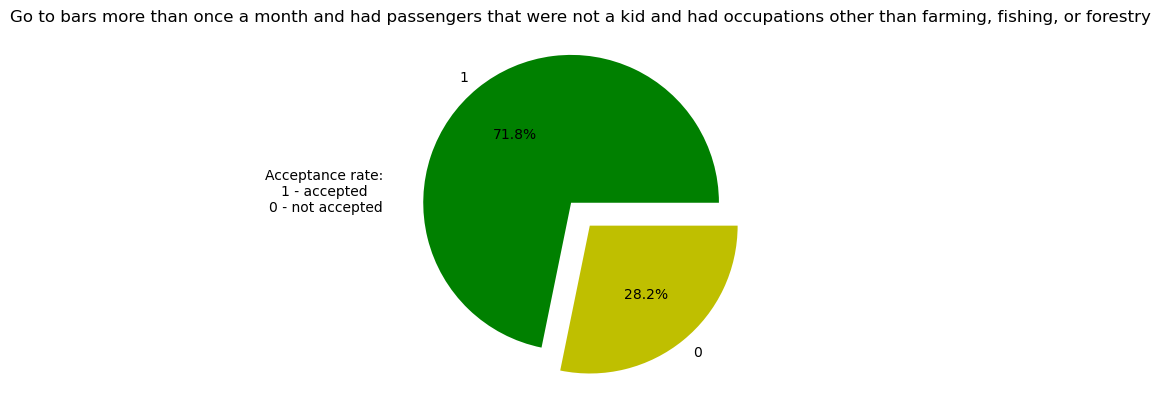

In [522]:
data_bar.query('GoToBarAndHadPassNotKidNoPeasand==1')['Y'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['g','y'])
plt.title("Go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry")
plt.ylabel("Acceptance rate: \n1 - accepted \n0 - not accepted", rotation=0, labelpad=50)
plt.show()

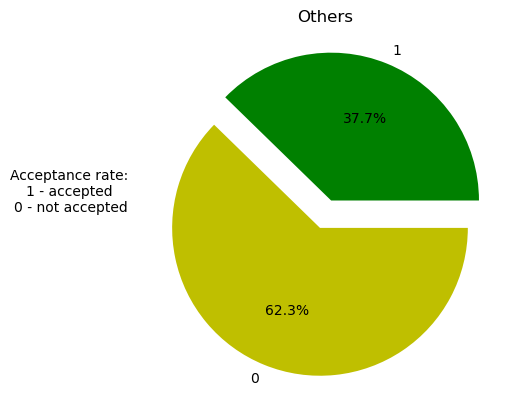

In [524]:
data_bar.query('GoToBarAndHadPassNotKidNoPeasand==0')['Y'].value_counts().sort_values().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['g','y'])
plt.title("Others")
plt.ylabel("Acceptance rate: \n1 - accepted \n0 - not accepted", rotation=0, labelpad=50)
plt.show()

**Answer:** The acceptance rate in the group (those who go to bar more than once a month and had passengers that were not a kind and had occupations other than farming, fishing, or forestry) is 71.8%. The acceptance rate is significantly larger compared to group of all others, which is 37.7%.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [525]:
barValList = ['1~3','4~8','gt8']       
passValList = ['Friend(s)','Partner'] 
marrValNotList = ['Widowed']
ageValList = ['below21','21','26']
cheapRestValList = ['4~8','gt8']
incomeValList = ['Less than $12500','$25000 - $37499','$12500 - $24999','$37500 - $49999']

data_bar['Data6_1'] = 0
data_bar['Data6_2'] = 0
data_bar['Data6_3'] = 0

data_bar.loc[data_bar["Bar"].isin(barValList) & data_bar["passanger"].isin(passValList) & ~data_bar["maritalStatus"].isin(marrValNotList), 'Data6_1']= 1
data_bar.loc[data_bar["Bar"].isin(barValList) & data_bar["age"].isin(ageValList), 'Data6_2']= 1
data_bar.loc[data_bar["RestaurantLessThan20"].isin(cheapRestValList) & data_bar["income"].isin(incomeValList), 'Data6_3']= 1


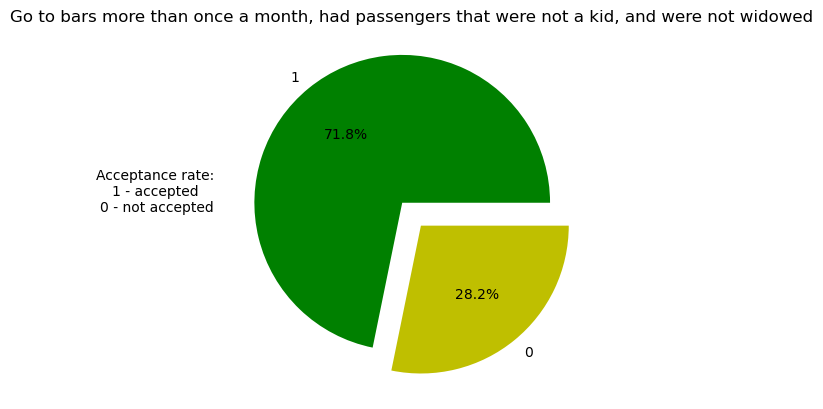

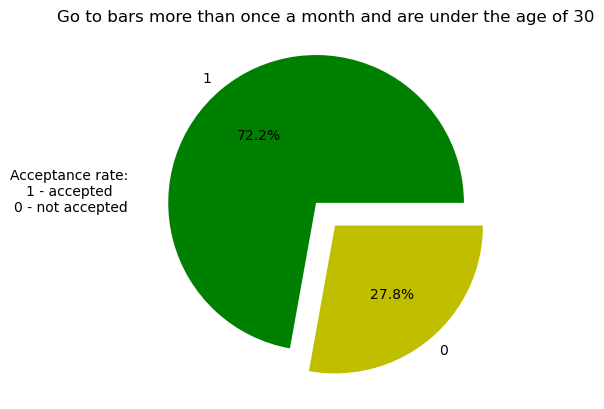

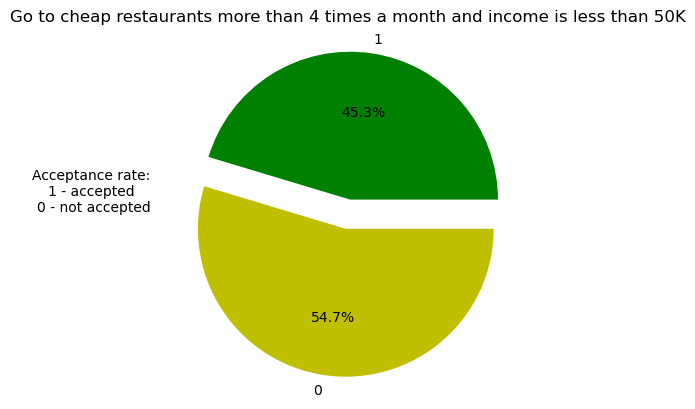

In [527]:
data_bar.query('Data6_1==1')['Y'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['g','y'])
plt.title("Go to bars more than once a month, had passengers that were not a kid, and were not widowed")
plt.ylabel("Acceptance rate: \n1 - accepted \n0 - not accepted", rotation=0, labelpad=50)
plt.show()

data_bar.query('Data6_2==1')['Y'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['g','y'])
plt.ylabel("Acceptance rate: \n1 - accepted \n0 - not accepted", rotation=0, labelpad=50)
plt.title("Go to bars more than once a month and are under the age of 30")
plt.show()

data_bar.query('Data6_3==1')['Y'].value_counts().sort_values().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['g','y'])
plt.ylabel("Acceptance rate: \n1 - accepted \n0 - not accepted", rotation=0, labelpad=50)
plt.title("Go to cheap restaurants more than 4 times a month and income is less than 50K")
plt.show()

**Answer:** The acceptance rate differs in all three groups. Acceptance rate is 71.8% for those who go to bars more than once a month, had passengers that were not a kid, and were not widowed. Acceptance rate is 72.2% for those who go to bars more than once a month and are under the age of 30. Acceptance rate is 45.3% for those who go to cheap restaurants more than 4 times a month and income is less than 50K.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Answer:**

1)	The average acceptance rate of coupons is 56.84%. However, bar coupons were accepted in 41.0% cases. Bar coupons are not among the most frequently used.
2)	Those customers who go to bars at least 4 times a month accept bar coupons twice as often as others. 
3)	Those customers who visit bars at least once a month and are over the age of 25 accept coupons twice as much (69% rate) compared to others (33.5% rate).
4)	Probably those who drive with friends or partner are more willing to accept a coupon for a bar than others.
5)	Respondents with lower income who go to cheap restaurants seem less interested in visiting bars (acceptance rate 45.3%). In contrast, there is much higher acceptance rate among those who are used to go to bar at least once a month, travel with partner or friends, or are under the age of 30.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  